In [ ]:
import polars as pl
import numpy as np

In [ ]:
# Define energy agent options
OPTIONS_AGENT_ENERGETIQUE_IDC = [
    {
        "label": "CAD réparti (kWh)",
        "unit": "kWh",
        "variable": "agent_energetique_ef_cad_reparti_kwh",
    },
    {
        "label": "CAD tarifé (kWh)",
        "unit": "kWh",
        "variable": "agent_energetique_ef_cad_tarife_kwh",
    },
    {
        "label": "Electricité PAC DD avant 5.8.10 (kWh)",
        "unit": "kWh",
        "variable": "agent_energetique_ef_electricite_pac_avant_kwh",
    },
    {
        "label": "Electricité PAC DD après 5.8.10 (kWh)",
        "unit": "kWh",
        "variable": "agent_energetique_ef_electricite_pac_apres_kwh",
    },
    {
        "label": "Electricité directe (kWh)",
        "unit": "kWh",
        "variable": "agent_energetique_ef_electricite_directe_kwh",
    },
    {
        "label": "Gaz naturel (m³)",
        "unit": "m³",
        "variable": "agent_energetique_ef_gaz_naturel_m3",
    },
    {
        "label": "Gaz naturel (kWh)",
        "unit": "kWh",
        "variable": "agent_energetique_ef_gaz_naturel_kwh",
    },
    {
        "label": "Mazout (litres)",
        "unit": "litres",
        "variable": "agent_energetique_ef_mazout_litres",
    },
    {
        "label": "Mazout (kg)",
        "unit": "kg",
        "variable": "agent_energetique_ef_mazout_kg",
    },
    {
        "label": "Mazout (kWh)",
        "unit": "kWh",
        "variable": "agent_energetique_ef_mazout_kwh",
    },
    {
        "label": "Bois buches dur (stère)",
        "unit": "stère",
        "variable": "agent_energetique_ef_bois_buches_dur_stere",
    },
    {
        "label": "Bois buches tendre (stère)",
        "unit": "stère",
        "variable": "agent_energetique_ef_bois_buches_tendre_stere",
    },
    {
        "label": "Bois buches tendre (kWh)",
        "unit": "kWh",
        "variable": "agent_energetique_ef_bois_buches_tendre_kwh",
    },
    {
        "label": "Pellets (m³)",
        "unit": "m³",
        "variable": "agent_energetique_ef_pellets_m3",
    },
    {
        "label": "Pellets (kg)",
        "unit": "kg",
        "variable": "agent_energetique_ef_pellets_kg",
    },
    {
        "label": "Pellets (kWh)",
        "unit": "kWh",
        "variable": "agent_energetique_ef_pellets_kwh",
    },
    {
        "label": "Plaquettes (m³)",
        "unit": "m³",
        "variable": "agent_energetique_ef_plaquettes_m3",
    },
    {
        "label": "Plaquettes (kWh)",
        "unit": "kWh",
        "variable": "agent_energetique_ef_plaquettes_kwh",
    },
    {
        "label": "Autre (kWh)",
        "unit": "kWh",
        "variable": "agent_energetique_ef_autre_kwh",
    },
]

Connecting to database at: c:\Users\denis.iglesias\Documents\GitHub\calcul_idc_dashboard\adresses_egid.db
File exists: True
File size: 675840 bytes

--- Tables in the database ---
Table: adresses_egid

--- Structure of table 'adresses_egid' ---
Column 0: adresse (TEXT), NULL allowed, 
Column 1: egid (BIGINT), NULL allowed, 

Total rows in 'adresses_egid': 19722

--- Sample data from 'adresses_egid' (first 5 rows) ---


,adresse,egid
0,L'Ancienne-Route 11,1017634
1,L'Ancienne-Route 15,295100476
2,L'Ancienne-Route 17B,2040131
3,L'Ancienne-Route 20,2040128
4,L'Ancienne-Route 3,1017633



--- Statistics for table 'adresses_egid' ---
Number of unique addresses: 18914

Sample unique addresses:
-  L'Ancienne-Route 11
-  L'Ancienne-Route 15
-  L'Ancienne-Route 17B
-  L'Ancienne-Route 20
-  L'Ancienne-Route 3

--- Custom explorations ---

Analyzing EGIDs in adresses_egid.egid


,egid,address_count
0,295526658,1
1,295526144,1
2,295525605,1
3,295525551,1
4,295524755,1
5,295524241,1
6,295524088,1
7,295523796,1
8,295523581,1
9,295523461,1


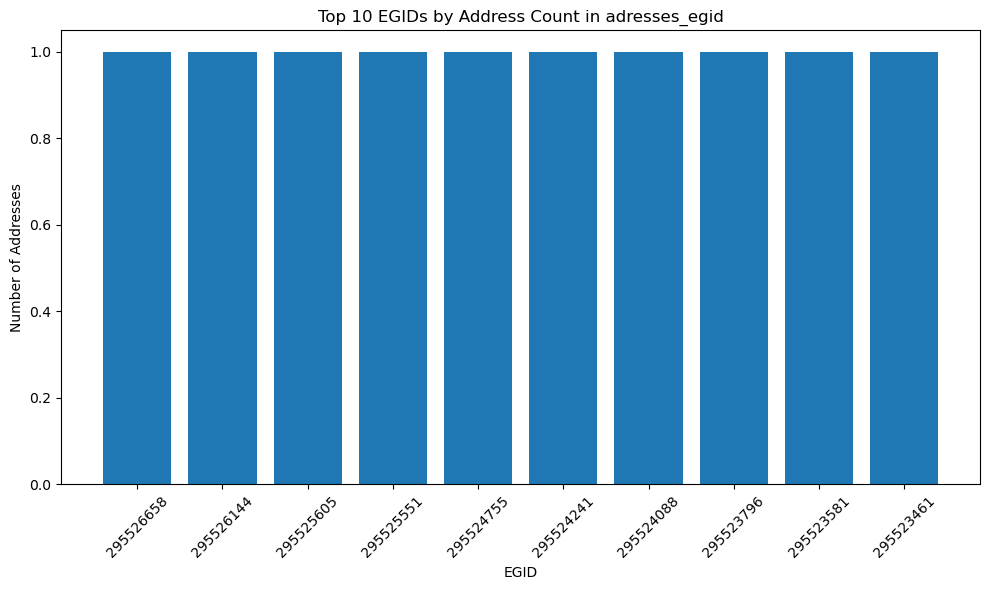


Database exploration complete!


In [2]:
# SQLite Database Explorer
%matplotlib inline
import sqlite3
import pandas as pd
import os
import matplotlib.pyplot as plt

# 1. Connect to the database file
# Replace with your actual database path if different
db_path = "adresses_egid.db"
abs_path = os.path.abspath(db_path)
print(f"Connecting to database at: {abs_path}")
print(f"File exists: {os.path.isfile(abs_path)}")
if os.path.isfile(abs_path):
    print(f"File size: {os.path.getsize(abs_path)} bytes")

# Connect to the database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# 2. List all tables in the database
print("\n--- Tables in the database ---")
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
for table in tables:
    print(f"Table: {table[0]}")

# 3. For each table, examine its structure and show sample data
for table_name in [table[0] for table in tables]:
    print(f"\n--- Structure of table '{table_name}' ---")
    cursor.execute(f"PRAGMA table_info({table_name});")
    columns = cursor.fetchall()
    for col in columns:
        print(f"Column {col[0]}: {col[1]} ({col[2]}), {'NOT NULL' if col[3] else 'NULL allowed'}, {'PRIMARY KEY' if col[5] else ''}")
    
    # 4. Count rows in the table
    cursor.execute(f"SELECT COUNT(*) FROM {table_name};")
    row_count = cursor.fetchone()[0]
    print(f"\nTotal rows in '{table_name}': {row_count}")
    
    # 5. Show sample data (first 5 rows)
    print(f"\n--- Sample data from '{table_name}' (first 5 rows) ---")
    query = f"SELECT * FROM {table_name} LIMIT 5;"
    
    # Use pandas to display the data in a nice format
    sample_df = pd.read_sql_query(query, conn)
    display(sample_df)
    
    # 6. For tables that might be the addresses table, show some stats
    if 'address' in [col[1].lower() for col in columns] or 'adresse' in [col[1].lower() for col in columns]:
        print(f"\n--- Statistics for table '{table_name}' ---")
        # Try to identify address column
        address_column = next((col[1] for col in columns if col[1].lower() in ['address', 'adresse']), None)
        
        if address_column:
            # Count unique addresses
            cursor.execute(f"SELECT COUNT(DISTINCT {address_column}) FROM {table_name};")
            unique_count = cursor.fetchone()[0]
            print(f"Number of unique addresses: {unique_count}")
            
            # Show first few unique addresses
            print(f"\nSample unique addresses:")
            cursor.execute(f"SELECT DISTINCT {address_column} FROM {table_name} LIMIT 5;")
            addresses = cursor.fetchall()
            for addr in addresses:
                print(f"- {addr[0]}")

# 7. Run some custom queries to explore specific aspects
# Example: If there's an EGID column, show distribution of addresses per EGID
print("\n--- Custom explorations ---")
egid_columns = []

for table_name in [table[0] for table in tables]:
    cursor.execute(f"PRAGMA table_info({table_name});")
    columns = cursor.fetchall()
    for col in columns:
        if col[1].lower() == 'egid':
            egid_columns.append((table_name, col[1]))

for table_name, egid_col in egid_columns:
    print(f"\nAnalyzing EGIDs in {table_name}.{egid_col}")
    
    # Count addresses per EGID
    query = f"""
    SELECT {egid_col}, COUNT(*) as address_count 
    FROM {table_name} 
    GROUP BY {egid_col} 
    ORDER BY address_count DESC 
    LIMIT 10;
    """
    
    egid_counts = pd.read_sql_query(query, conn)
    display(egid_counts)
    
    # Plot distribution
    if not egid_counts.empty:
        plt.figure(figsize=(10, 6))
        plt.bar(egid_counts[egid_col].astype(str), egid_counts['address_count'])
        plt.title(f'Top 10 EGIDs by Address Count in {table_name}')
        plt.xlabel('EGID')
        plt.ylabel('Number of Addresses')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Close the connection
conn.close()
print("\nDatabase exploration complete!")